In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-for-admission-in-the-university/adm_data.csv


# Import Libraries

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import median_absolute_error
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor

# Read data

In [3]:
data=pd.read_csv('/kaggle/input/data-for-admission-in-the-university/adm_data.csv')

# Show 5 frist row in data

In [4]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


# Show data columns

In [5]:
x=1
for col in data.columns:
    print(f'column {x} is :',col)
    x+=1

column 1 is : Serial No.
column 2 is : GRE Score
column 3 is : TOEFL Score
column 4 is : University Rating
column 5 is : SOP
column 6 is : LOR 
column 7 is : CGPA
column 8 is : Research
column 9 is : Chance of Admit 


# Show data corr

In [6]:
data.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


# Display data corr

<AxesSubplot:>

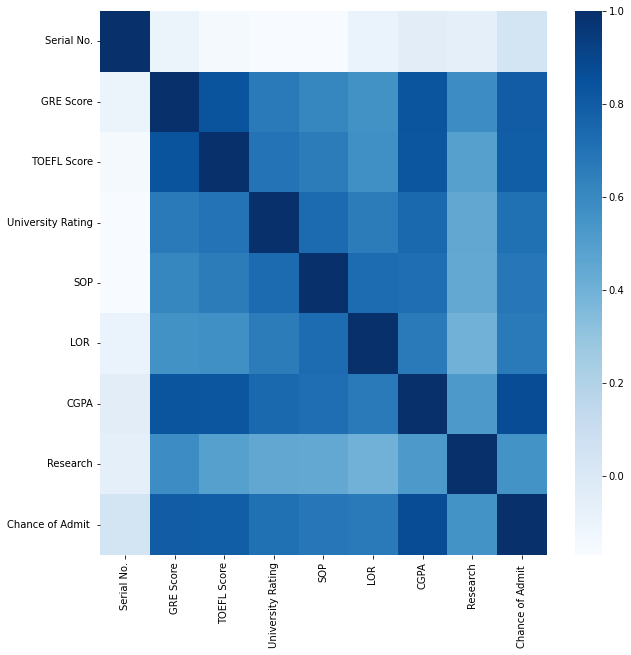

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),cmap = 'Blues')

# Show corr between data and Chance of Admit

In [8]:
admit_chance = data.corr()['Chance of Admit ']
admit_chance

Serial No.           0.042336
GRE Score            0.802610
TOEFL Score          0.791594
University Rating    0.711250
SOP                  0.675732
LOR                  0.669889
CGPA                 0.873289
Research             0.553202
Chance of Admit      1.000000
Name: Chance of Admit , dtype: float64

# Display corr between data and Chance of Admit 

<AxesSubplot:>

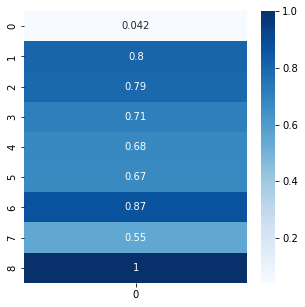

In [9]:
admit_chance=np.array(admit_chance).reshape(9,1)
plt.figure(figsize=(5,5))
sns.heatmap(admit_chance, annot = True, cmap = 'Blues')

# Show data info

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


# Show data contain null data

In [11]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

# Show data contain duplicate data

In [12]:
data.duplicated().sum()

0

# Data Describe

In [13]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


# Show input X and output y

In [14]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

# Show input X

In [15]:
X

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1
396,397,325,107,3,3.0,3.5,9.11,1
397,398,330,116,4,5.0,4.5,9.45,1
398,399,312,103,3,3.5,4.0,8.78,0


# Show ouput y

In [16]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

# MinMaxScaler for Data

In [17]:
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
X = scaler.fit_transform(X)
print('X \n' , X[:10])
print('y \n' , y[:10])

X 
 [[0.         0.94       0.92857143 0.75       0.875      0.875
  0.91346154 1.        ]
 [0.00250627 0.68       0.53571429 0.75       0.75       0.875
  0.66346154 1.        ]
 [0.00501253 0.52       0.42857143 0.5        0.5        0.625
  0.38461538 1.        ]
 [0.0075188  0.64       0.64285714 0.5        0.625      0.375
  0.59935897 1.        ]
 [0.01002506 0.48       0.39285714 0.25       0.25       0.5
  0.45192308 0.        ]
 [0.01253133 0.8        0.82142857 1.         0.875      0.5
  0.81410256 1.        ]
 [0.01503759 0.62       0.60714286 0.5        0.5        0.75
  0.44871795 1.        ]
 [0.01754386 0.36       0.32142857 0.25       0.5        0.75
  0.3525641  0.        ]
 [0.02005013 0.24       0.35714286 0.         0.25       0.125
  0.38461538 0.        ]
 [0.02255639 0.66       0.57142857 0.5        0.625      0.5
  0.57692308 0.        ]]
y 
 0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
5    0.90
6    0.75
7    0.68
8    0.50
9    0.45
Name: Chance of Adm

# Splitting data

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=44, shuffle =True)
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (300, 8)
X_test shape is  (100, 8)
y_train shape is  (300,)
y_test shape is  (100,)


# Applying Linear Regression Model

In [19]:
LinearRegressionModel = LinearRegression(fit_intercept=True, normalize=True,copy_X=True,n_jobs=-1)
LinearRegressionModel.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(n_jobs=-1, normalize=True)

# Calculating Details

In [20]:
print('Linear Regression Train Score is : ' , LinearRegressionModel.score(X_train, y_train))
print('Linear Regression Test Score is : ' , LinearRegressionModel.score(X_test, y_test))
print('Linear Regression Coef is : ' , LinearRegressionModel.coef_)
print('Linear Regression intercept is : ' , LinearRegressionModel.intercept_)

Linear Regression Train Score is :  0.8134280745219549
Linear Regression Test Score is :  0.8282849637550226
Linear Regression Coef is :  [0.06645706 0.10068436 0.08896733 0.04061515 0.00056174 0.0658846
 0.34301032 0.02835824]
Linear Regression intercept is :  0.3131302063502122


# Applying Random Forest Regressor Model

In [21]:
RandomForestRegressorModel = RandomForestRegressor(n_estimators=100,max_depth=15, random_state=33)
RandomForestRegressorModel.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, random_state=33)

# Calculating Details

In [22]:
print('Random Forest Regressor Train Score is : ' , RandomForestRegressorModel.score(X_train, y_train))
print('Random Forest Regressor Test Score is : ' , RandomForestRegressorModel.score(X_test, y_test))
print('Random Forest Regressor No. of features are : ' , RandomForestRegressorModel.n_features_)
print('Random Forest Regressor features importances are : ' , RandomForestRegressorModel.feature_importances_)

Random Forest Regressor Train Score is :  0.9709048829538982
Random Forest Regressor Test Score is :  0.8574643820529987
Random Forest Regressor No. of features are :  8
Random Forest Regressor features importances are :  [0.07031227 0.05379242 0.0290632  0.01175073 0.01680246 0.01590001
 0.79013784 0.01224107]


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


# Applying MLPRegressor Model 

In [23]:
MLPRegressorModel = MLPRegressor(activation='tanh', # can be also identity , logistic , relu
                                 solver='lbfgs',  # can be also sgd , adam
                                 learning_rate='constant', # can be also invscaling , adaptive
                                 early_stopping= False,
                                 alpha=0.0001 ,hidden_layer_sizes=(100, 5),random_state=33)
MLPRegressorModel.fit(X_train, y_train)

MLPRegressor(activation='tanh', hidden_layer_sizes=(100, 5), random_state=33,
             solver='lbfgs')

# Calculating Details

In [24]:
print('MLPRegressorModel Train Score is : ' , MLPRegressorModel.score(X_train, y_train))
print('MLPRegressorModel Test Score is : ' , MLPRegressorModel.score(X_test, y_test))
print('MLPRegressorModel loss is : ' , MLPRegressorModel.loss_)
print('MLPRegressorModel No. of iterations is : ' , MLPRegressorModel.n_iter_)
print('MLPRegressorModel No. of layers is : ' , MLPRegressorModel.n_layers_)
print('MLPRegressorModel last activation is : ' , MLPRegressorModel.out_activation_)

MLPRegressorModel Train Score is :  0.8322304687501737
MLPRegressorModel Test Score is :  0.8160826805826766
MLPRegressorModel loss is :  0.0017169282190960503
MLPRegressorModel No. of iterations is :  56
MLPRegressorModel No. of layers is :  4
MLPRegressorModel last activation is :  identity


# Applying DecisionTreeRegressor Model 

In [25]:
DecisionTreeRegressorModel = DecisionTreeRegressor( max_depth=5,random_state=33)
DecisionTreeRegressorModel.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=33)

# Calculating Details

In [26]:
print('DecisionTreeRegressor Train Score is : ' , DecisionTreeRegressorModel.score(X_train, y_train))
print('DecisionTreeRegressor Test Score is : ' , DecisionTreeRegressorModel.score(X_test, y_test))

DecisionTreeRegressor Train Score is :  0.8941286282315031
DecisionTreeRegressor Test Score is :  0.792021505368453


# Applying SVR Model 

In [27]:
SVRModel = SVR(C = 1.0 ,epsilon=0.1,kernel = 'rbf') # it also can be : linear, poly, rbf, sigmoid, precomputed
SVRModel.fit(X_train, y_train)

SVR()

# Calculating Details

In [28]:
print('SVRModel Train Score is : ' , SVRModel.score(X_train, y_train))
print('SVRModel Test Score is : ' , SVRModel.score(X_test, y_test))

SVRModel Train Score is :  0.803119084415997
SVRModel Test Score is :  0.7848574997058455


# Applying KNeighborsRegressor Model

In [29]:
KNeighborsRegressorModel = KNeighborsRegressor(n_neighbors =5, weights='distance', #also can be : distance, or defined function 
                                               algorithm = 'auto')    #also can be : ball_tree ,  kd_tree  , brute
KNeighborsRegressorModel.fit(X_train, y_train)

KNeighborsRegressor(weights='distance')

# Calculating Details

In [30]:
print('KNeighborsRegressorModel Train Score is : ' , KNeighborsRegressorModel.score(X_train, y_train))
print('KNeighborsRegressorModel Test Score is : ' , KNeighborsRegressorModel.score(X_test, y_test))

KNeighborsRegressorModel Train Score is :  1.0
KNeighborsRegressorModel Test Score is :  0.823627642067358


# Applying Gradient Boosting Regressor Model

In [31]:
GBRModel = GradientBoostingRegressor(n_estimators=100,max_depth=5,learning_rate = .5 ,random_state=33)
GBRModel.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.5, max_depth=5, random_state=33)

# Calculating Details

In [32]:
print('GBRModel Train Score is : ' , GBRModel.score(X_train, y_train))
print('GBRModel Test Score is : ' , GBRModel.score(X_test, y_test))

GBRModel Train Score is :  0.9999999042317869
GBRModel Test Score is :  0.8197678023867483


# Applying SGDRegressor Model 

In [33]:
SGDRegressionModel = SGDRegressor(alpha=0.1,random_state=33,penalty='l2',loss = 'huber')
SGDRegressionModel.fit(X_train, y_train)

SGDRegressor(alpha=0.1, loss='huber', random_state=33)

# Calculating Details

In [34]:
print('SGD Regression Train Score is : ' , SGDRegressionModel.score(X_train, y_train))
print('SGD Regression Test Score is : ' , SGDRegressionModel.score(X_test, y_test))
print('SGD Regression Coef is : ' , SGDRegressionModel.coef_)
print('SGD Regression intercept is : ' , SGDRegressionModel.intercept_)

SGD Regression Train Score is :  0.730922022297426
SGD Regression Test Score is :  0.7481810335557195
SGD Regression Coef is :  [0.09599689 0.09870252 0.10317753 0.08903511 0.1019196  0.10960264
 0.10886689 0.07574171]
SGD Regression intercept is :  [0.2688947]


# Show RandomForestRegressorModel.feature_importances_

In [35]:
plt.figure(figsize=(15,15))
plt.bar(X.keys(),RandomForestRegressorModel.feature_importances_)

AttributeError: 'numpy.ndarray' object has no attribute 'keys'

<Figure size 1080x1080 with 0 Axes>

# Calculating Prediction

In [ ]:
y_pred = RandomForestRegressorModel.predict(X_test)
y_pred

# Calculating Mean Absolute Error

In [ ]:
MAEValue = mean_absolute_error(y_test, y_pred, multioutput='uniform_average')
print('Mean Absolute Error Value is : ', MAEValue)

# Calculating Mean Squared Error

In [ ]:
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Squared Error Value is : ', MSEValue)

# Calculating Median Absolute Error

In [ ]:
MdSEValue = median_absolute_error(y_test, y_pred)
print('Median Absolute Error Value is : ', MdSEValue )

# Show y_train and y_train_pred

In [ ]:
y_bar=list(range(1,301))
plt.scatter(y_bar,y_train,label='y_train')
plt.scatter(y_bar,RandomForestRegressorModel.predict(X_train),label='y_pred')
plt.title('y_train and y_train_pred')
plt.legend()

# Show y_test and y_test_pred

In [ ]:
y_bar=list(range(1,101))
plt.scatter(y_bar,y_test,label='y_test')
plt.scatter(y_bar,RandomForestRegressorModel.predict(X_test),label='y_pred')
plt.title('y_test and y_test_pred')
plt.legend()

y_pred to csv

In [ ]:
submision=pd.DataFrame(y_pred,columns=['prediction'])
submision.to_csv('/kaggle/working/prediction.csv')
submision